# Multiple Linear Regression-Toyota_Corolla_Price

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [129]:
# Price with respect to different features
crla_pr = pd.read_csv("https://raw.githubusercontent.com/SayaliD6/Datasets_used_in_assignments/main/ToyotaCorolla_MLR.csv")

In [130]:
# Displaying first ten records
crla_pr.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [131]:
# Shape of the data
crla_pr.shape

(1436, 11)

In [132]:
# Summary of the data
crla_pr.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [133]:
# Check the data types
crla_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


### Handling missing values

In [134]:
# Check for Null values
crla_pr.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [135]:
# Check for duplicate values
crla_pr[crla_pr.duplicated()].shape

(1, 11)

In [136]:
crla_pr[crla_pr.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [137]:
# As there is a duplicate observation, remove it from the dataset
crla_pr = crla_pr.drop_duplicates()

In [138]:
crla_pr.reset_index(inplace=True,drop=True)
crla_pr

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


### Data Visualisation

#### Differentiate Discrete and Continuous features

In [139]:
x=[]
for feature in crla_pr.columns:
    if len(crla_pr[feature].unique())<20:
        x.append(feature)
dis = pd.DataFrame(x,columns=["Discrete features"])

In [140]:
y=[]
for feature in crla_pr.columns:
    if len(crla_pr[feature].unique())>20:
        y.append(feature)
cont = pd.DataFrame(y,columns=["Continuous features"])

In [141]:
dis_cont = pd.concat([dis,cont],axis=1)
dis_cont

,Discrete features,Continuous features
0,Fuel_Type,Price
1,HP,Age_08_04
2,Automatic,KM
3,cc,Weight
4,Doors,NaN
5,Cylinders,NaN
6,Gears,NaN


In [142]:
crla_pr_dis=crla_pr[x]
crla_pr_dis

,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears
0,Diesel,90,0,2000,3,4,5
1,Diesel,90,0,2000,3,4,5
2,Diesel,90,0,2000,3,4,5
3,Diesel,90,0,2000,3,4,5
4,Diesel,90,0,2000,3,4,5
...,...,...,...,...,...,...,...
1430,Petrol,86,0,1300,3,4,5
1431,Petrol,86,0,1300,3,4,5
1432,Petrol,86,0,1300,3,4,5
1433,Petrol,86,0,1300,3,4,5


In [143]:
crla_pr_cont=crla_pr[y]
crla_pr_cont

,Price,Age_08_04,KM,Weight
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,14950,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1430,7500,69,20544,1025
1431,10845,72,19000,1015
1432,8500,71,17016,1015
1433,7250,70,16916,1015


#### Visualizing continuous features

#### Histogram

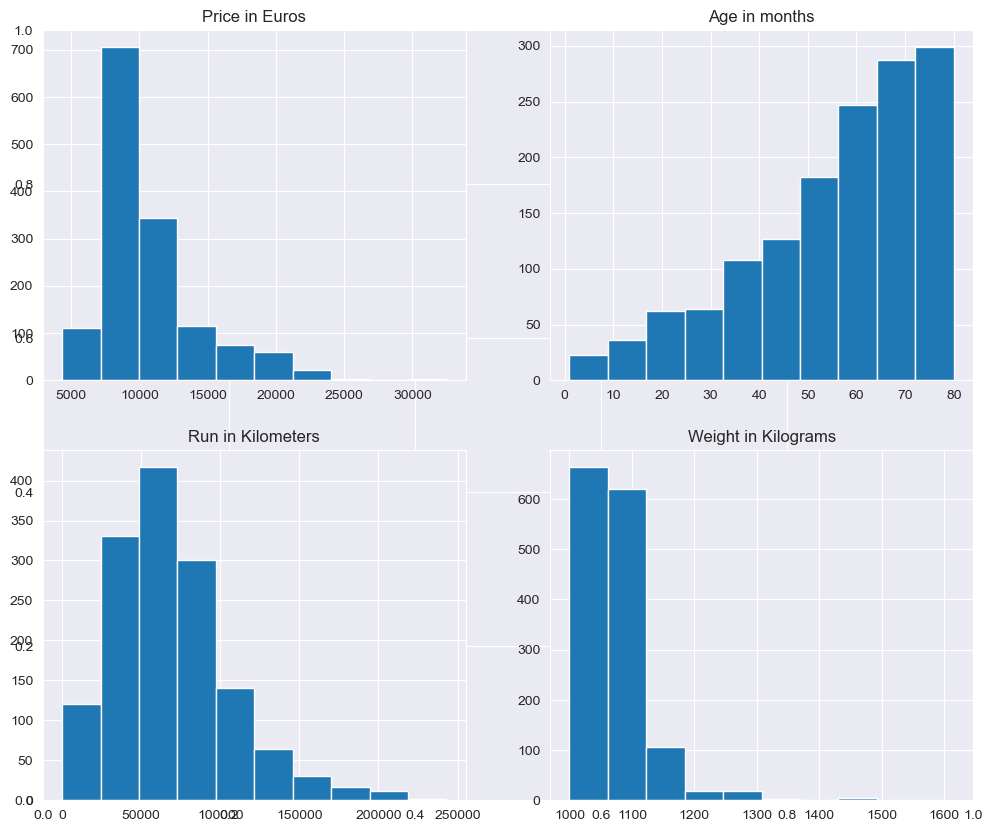

In [144]:
plt.subplots(figsize = (12,10))
plt.subplot(2,2,1)
plt.hist(crla_pr['Price'])
plt.title('Price in Euros')
plt.subplot(2,2,2)
plt.hist(crla_pr['Age_08_04'])
plt.title('Age in months')
plt.subplot(2,2,3)
plt.hist(crla_pr['KM'])
plt.title('Run in Kilometers')
plt.subplot(2,2,4)
plt.hist(crla_pr['Weight'])
plt.title('Weight in Kilograms')
plt.show()

#### Boxplot

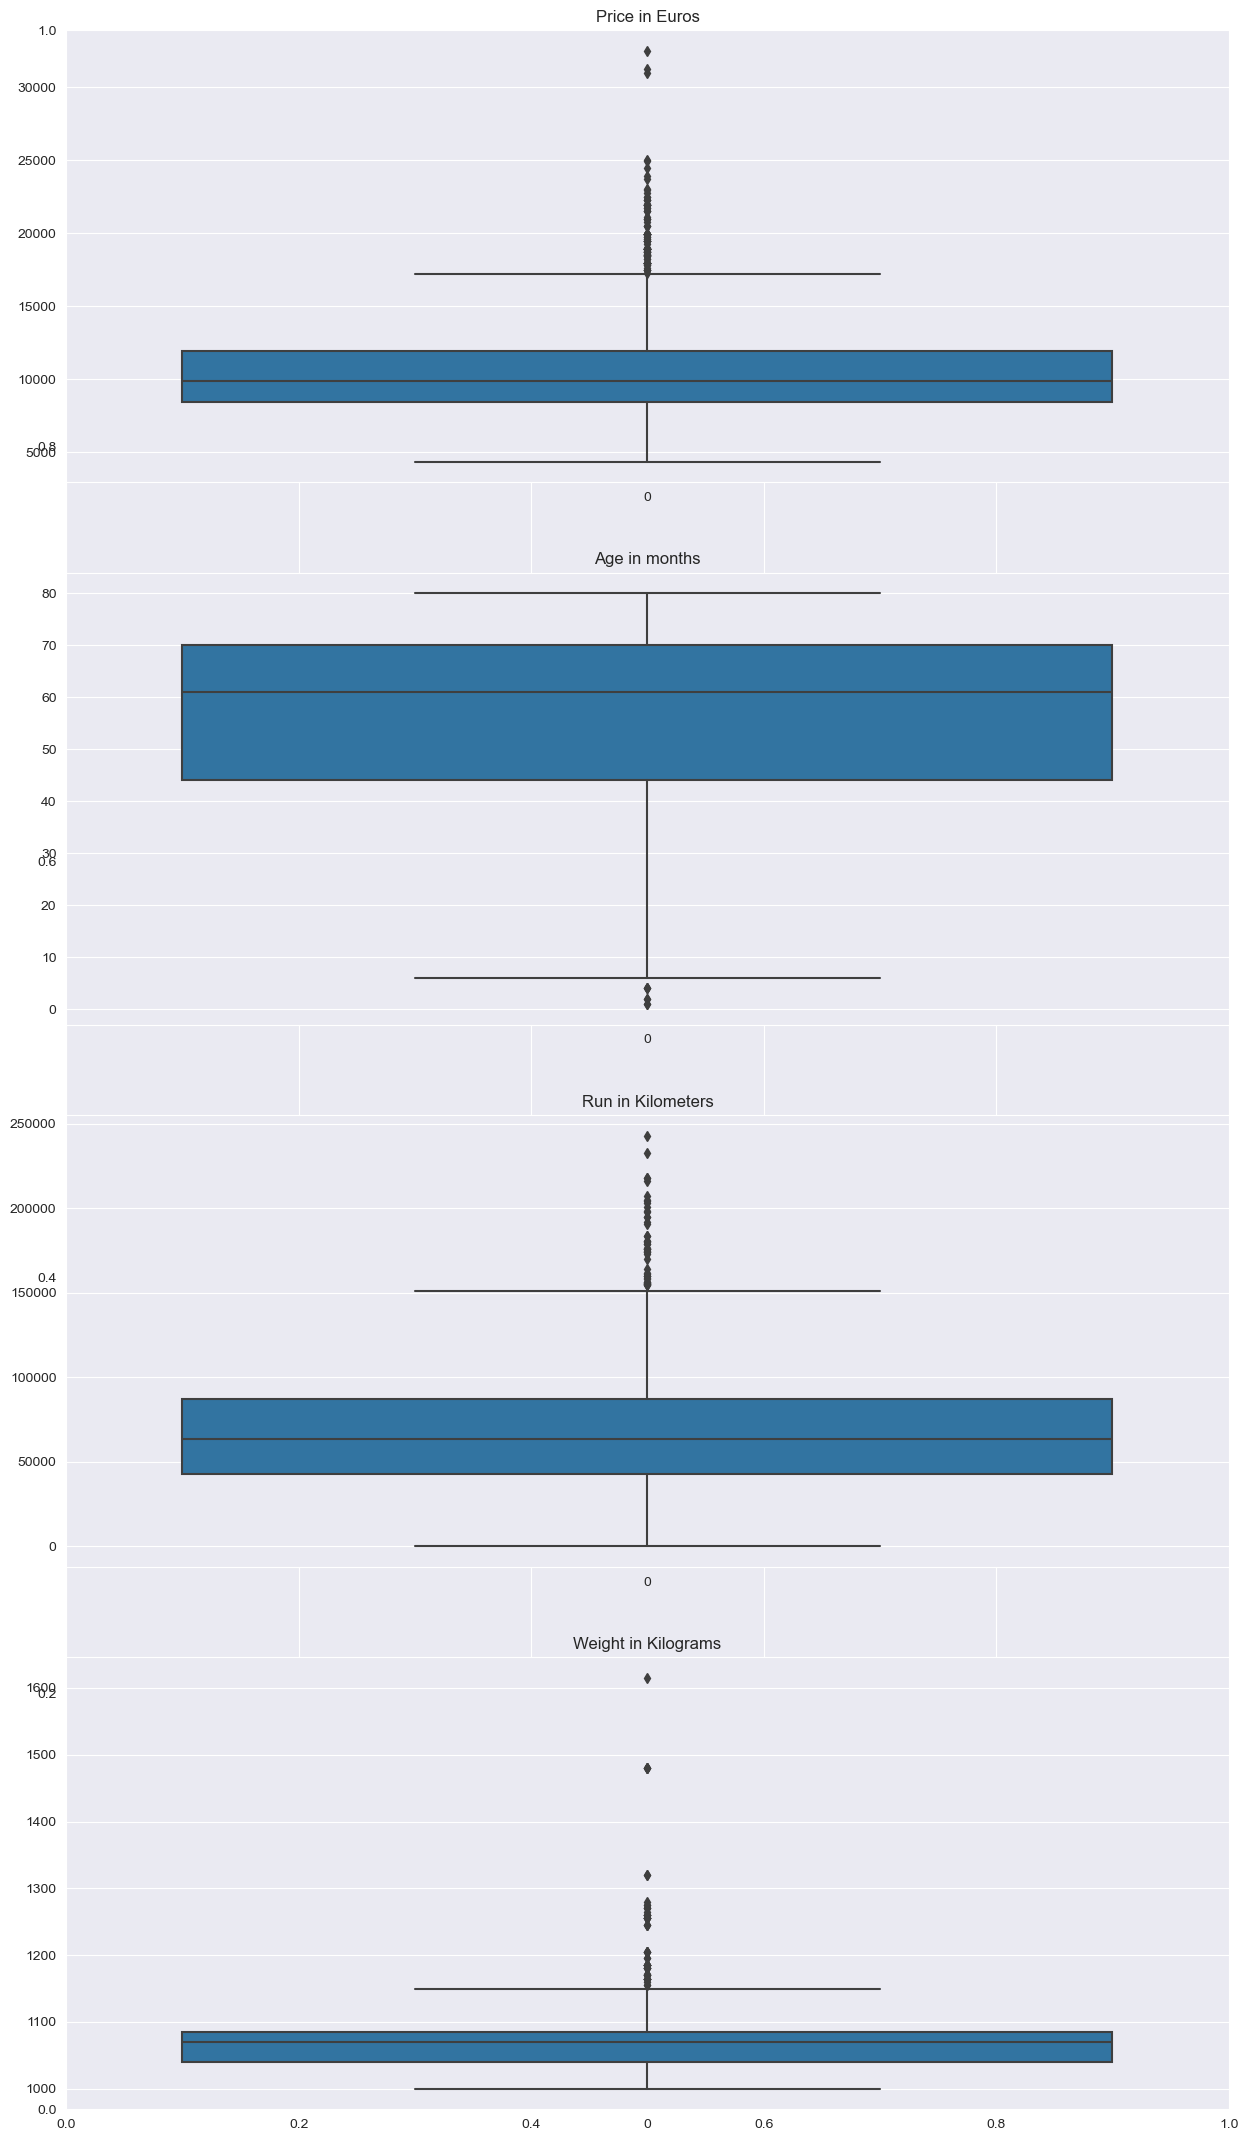

In [145]:
plt.subplots(figsize = (15,27))
plt.subplot(4,1,1)
sb.boxplot(crla_pr['Price'])
plt.title('Price in Euros')
plt.subplot(4,1,2)
sb.boxplot(crla_pr['Age_08_04'])
plt.title('Age in months')
plt.subplot(4,1,3)
sb.boxplot(crla_pr['KM'])
plt.title('Run in Kilometers')
plt.subplot(4,1,4)
sb.boxplot(crla_pr['Weight'])
plt.title('Weight in Kilograms')
plt.show()

#### We can observe that there are outliers in all the above features. The outliers are to be investigated to get accurate model.

#### Q-Q plot

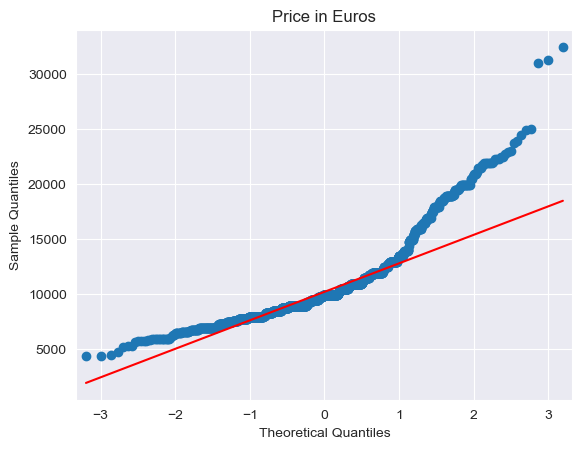

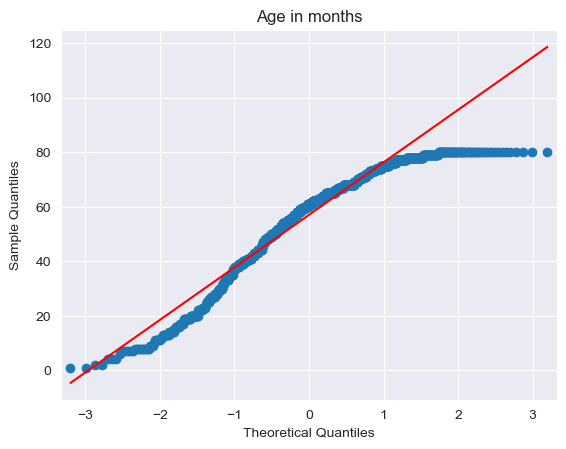

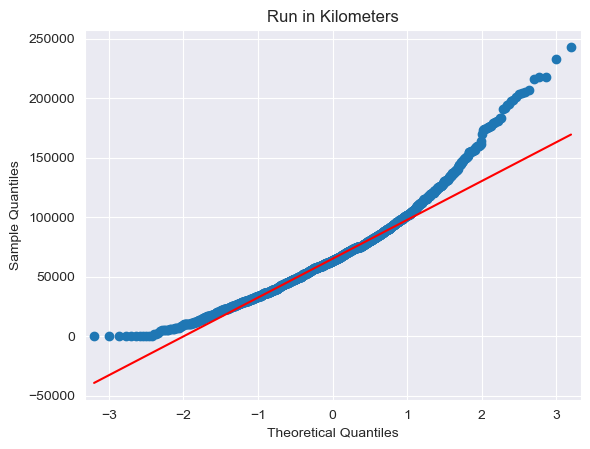

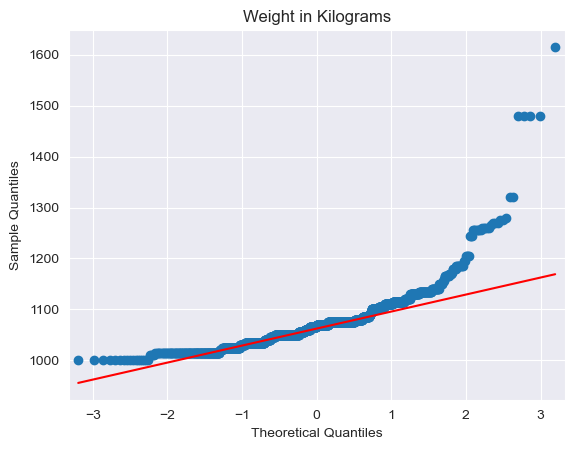

In [146]:
# To check whether the data is following normal distribution
sm.qqplot(crla_pr['Price'], line = 'q')
plt.title('Price in Euros')
sm.qqplot(crla_pr['Age_08_04'], line = 'q')
plt.title('Age in months')
sm.qqplot(crla_pr['KM'], line = 'q')
plt.title('Run in Kilometers')
sm.qqplot(crla_pr['Weight'], line = 'q')
plt.title('Weight in Kilograms')
plt.show()

#### Correlation and Heat map

In [147]:
# Checking for Correlation between variables
crla_pr_cont.corr()

,Price,Age_08_04,KM,Weight
Price,1.000000,-0.876273,-0.569420,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.466484
KM,-0.569420,0.504575,1.000000,-0.023969
Weight,0.575869,-0.466484,-0.023969,1.000000


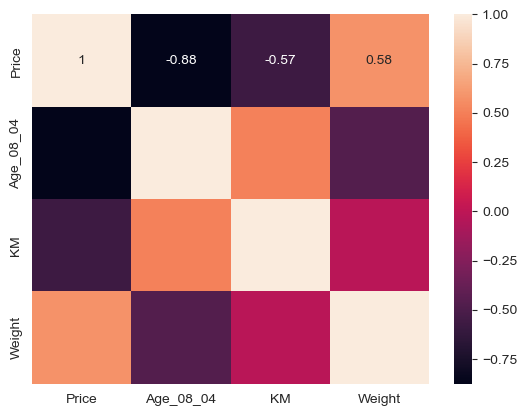

In [148]:
sb.heatmap(crla_pr_cont.corr(),annot=True)
plt.show()

#### We can observe that the Price is strongly related with Age. The Price are moderately related with Weight and Run features .

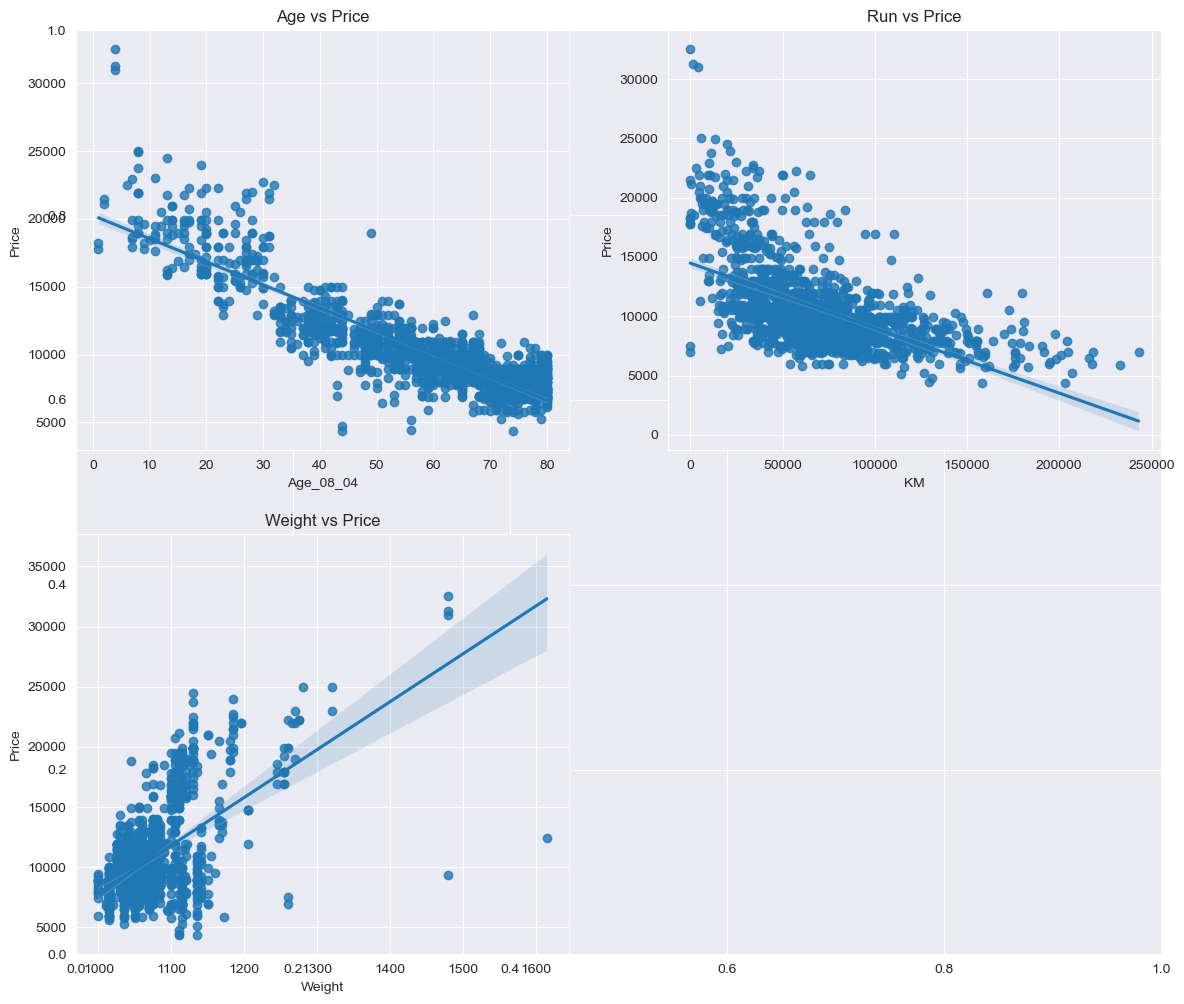

In [149]:
plt.subplots(figsize = (14,12))
plt.subplot(2,2,1)
sb.regplot(x=crla_pr_cont['Age_08_04'],y=crla_pr['Price'])
plt.title('Age vs Price')
plt.subplot(2,2,2)
sb.regplot(x=crla_pr_cont['KM'],y=crla_pr['Price'])
plt.title('Run vs Price')
plt.subplot(2,2,3)
sb.regplot(x=crla_pr_cont['Weight'],y=crla_pr['Price'])
plt.title('Weight vs Price')
plt.show()

#### Pair plot

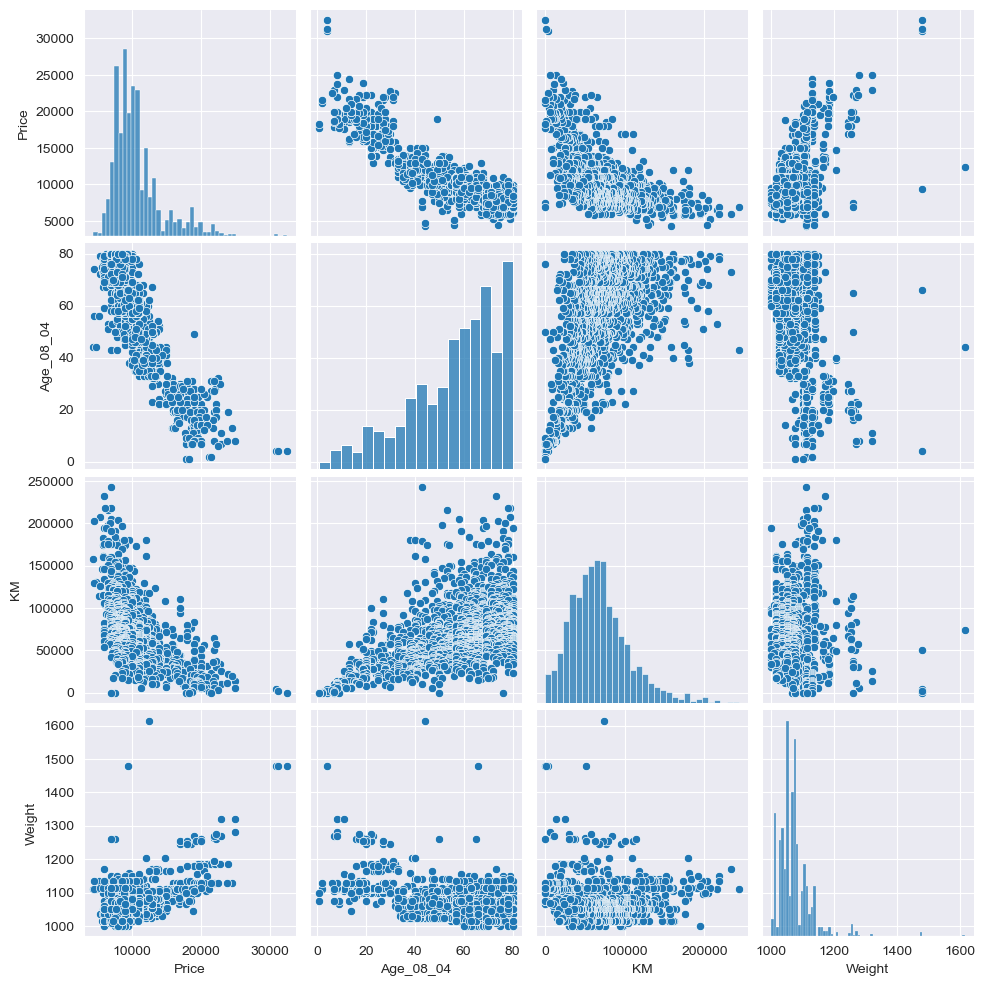

In [150]:
sb.set_style(style='darkgrid')
sb.pairplot(crla_pr_cont)
plt.show()

#### Visualizing discrete features

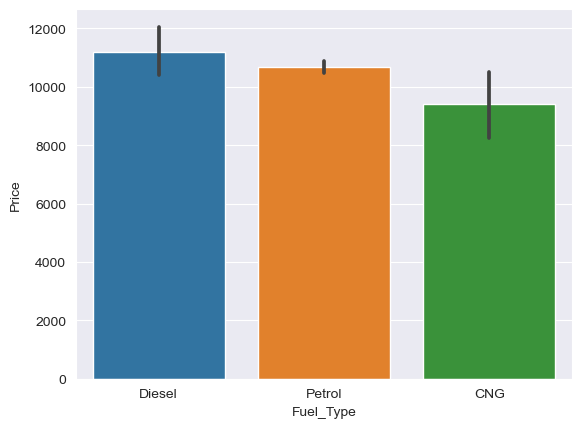

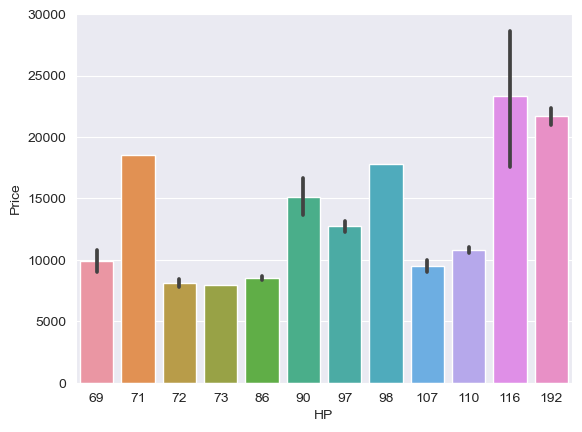

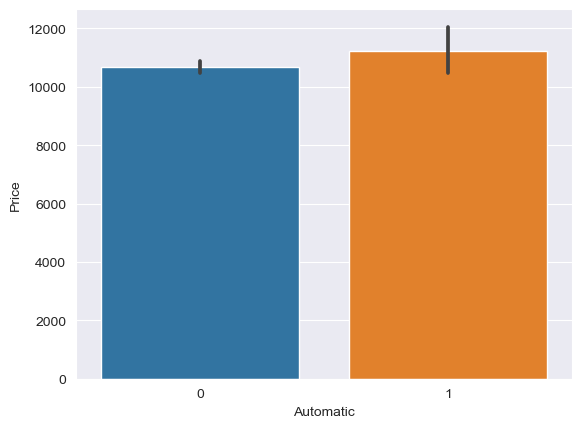

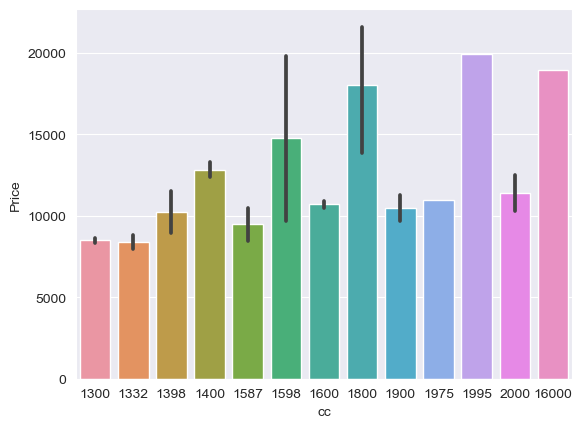

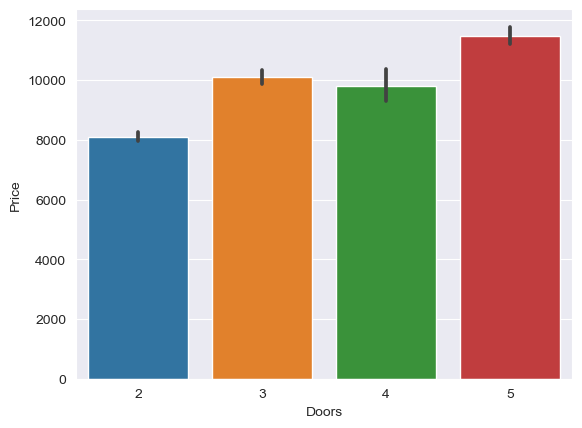

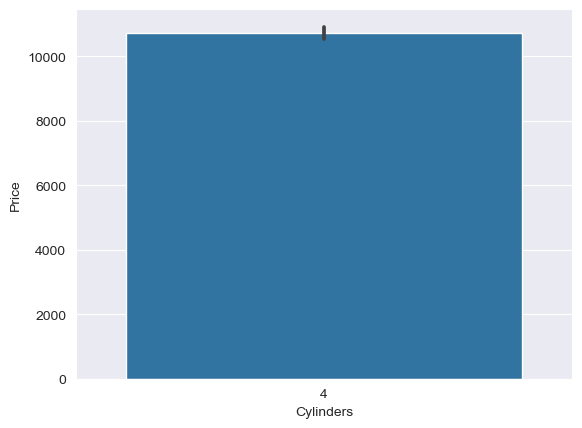

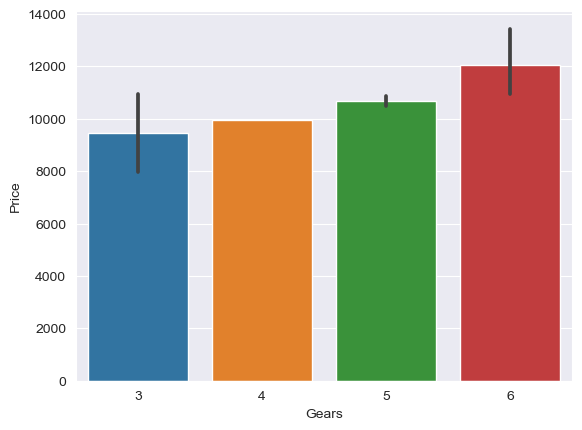

In [151]:
for i in crla_pr_dis.columns:
    plt.figure()
    sb.barplot(data=crla_pr,x=i,y='Price')
plt.show()

#### Correlation and Heat map

In [152]:
# Checking for Correlation between variables
co_rel = pd.concat([crla_pr_dis,crla_pr['Price']],axis=1)
co_rel
co_rel.corr()

,HP,Automatic,cc,Doors,Cylinders,Gears,Price
HP,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.314134
Automatic,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.033928
cc,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.124375
Doors,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.183604
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.063831
Price,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,1.000000


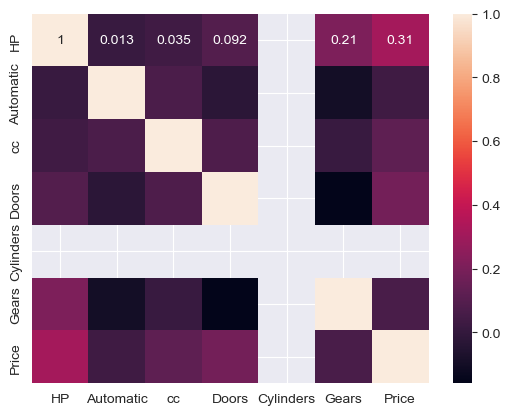

In [153]:
sb.heatmap(co_rel.corr(),annot=True)
plt.show()

#### We can clearly see that there is very weak correlation between Price and other variables, as the correlation values are <0.5.
#### Hence consider only continuous variables in our model.

### Build a Multiple Linear Regeression model

### Fitting the model considering Raw data

In [154]:
# The Multiple Linear regression equation is Price=βo+β1(Age)+β2(Run)+β3(Weight).
# Using the following code we build a Multiple linear regression model, which predicts the price for given parameters
model=smf.ols("Price~Age_08_04+KM+Weight",data=crla_pr_cont).fit()

#### Printing Estimated Parameters

In [155]:
# We get values of βo,β1,β2,β3
model.params

Intercept   -1722.709518
Age_08_04    -120.268560
KM             -0.024114
Weight         19.425617
dtype: float64

### Model Diagnostics

#### Residuals

In [156]:
# Residuals or errors of the model for each observation. Error = Actual value - Predicted value
model.resid

0      -3508.950179
1      -2633.174959
2      -3065.881507
3      -1673.693184
4      -2718.827396
           ...     
1430   -1894.625074
1431    1968.205190
1432    -544.904996
1433   -1917.584929
1434   -3826.993285
Length: 1435, dtype: float64

In [157]:
# Standardised residuals
model.resid_pearson

array([-2.48115129, -1.86189746, -2.16786089, ..., -0.38529807,
       -1.35590934, -2.70603709])

#### Predicted values

In [158]:
pred=model.predict(crla_pr)
pred

0       17008.950179
1       16383.174959
2       17015.881507
3       16623.693184
4       16468.827396
            ...     
1430     9394.625074
1431     8876.794810
1432     9044.904996
1433     9167.584929
1434    10776.993285
Length: 1435, dtype: float64

#### Overall Summary

In [159]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2635.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:28   Log-Likelihood:                -12444.
No. Observations:                1435   AIC:                         2.490e+04
Df Residuals:                    1431   BIC:                         2.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1722.7095    967.073     -1.781      0.075   -3619.743     174.324
Age_08_04   -120.2686      2.741    -43.881      0.000    -125.645    -114.892
KM            -0.0241      0.001    -20.083      0.000      -0.026      -0.022
Weight        19.4256      0.841     23.101      0.000      17.776      21.075
==============================================================================
Omnibus:                      216.390   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2156.068
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       8.964   Cond. No.                     2.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Root Mean Square Error(RMSE)

In [160]:
rmse = np.sqrt(model.mse_resid)
rmse

1414.242733320169

#### From the Summary, we can see that the R² value is good and the Root Mean Square Error value is low.
#### As the pvalues for independent features are less than 0.05. They seem to be significant.

### Treating the Outlier 

#### In the boxplot, we observed that there are outliers. The same are to be detected now.

### Detecting the outlier

#### Using Interquartile range method

#### Price feature

In [161]:
Q1 = np.quantile(crla_pr_cont.Price,0.25)
Q3 = np.quantile(crla_pr_cont.Price,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 8450.0 
Third Quartile= 11950.0 
Inter-Quartile Range= 3500.0 
Upper fence = 17200.0 
Lower fence= 3200.0


In [162]:
crla_pr_cont[(crla_pr_cont.Price <= lower_fence) | (crla_pr_cont.Price >= upper_fence)]

,Price,Age_08_04,KM,Weight
7,18600,30,75889,1245
8,21500,27,19700,1185
10,20950,25,31461,1185
11,19950,22,43610,1185
12,19600,25,32189,1185
...,...,...,...,...
181,21125,2,225,1110
182,21500,2,15,1130
183,17795,1,1,1100
184,18245,1,1,1075


#### Hence we can see that there are outliers in the Price feature and shall be treated.

#### Age feature

In [163]:
Q1 = np.quantile(crla_pr_cont.Age_08_04,0.25)
Q3 = np.quantile(crla_pr_cont.Age_08_04,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 44.0 
Third Quartile= 70.0 
Inter-Quartile Range= 26.0 
Upper fence = 109.0 
Lower fence= 5.0


In [164]:
crla_pr_cont[(crla_pr_cont.Age_08_04 <= lower_fence) | (crla_pr_cont.Age_08_04 >= upper_fence)]

,Price,Age_08_04,KM,Weight
109,32500,4,1,1480
110,31000,4,4000,1480
111,31275,4,1500,1480
181,21125,2,225,1110
182,21500,2,15,1130
183,17795,1,1,1100
184,18245,1,1,1075


#### Hence we can see that there are outliers in the Age feature and shall be treated.

#### Run feature

In [165]:
Q1 = np.quantile(crla_pr_cont.KM,0.25)
Q3 = np.quantile(crla_pr_cont.KM,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 43000.0 
Third Quartile= 87041.5 
Inter-Quartile Range= 44041.5 
Upper fence = 153103.75 
Lower fence= -23062.25


In [166]:
crla_pr_cont[(crla_pr_cont.KM <= lower_fence) | (crla_pr_cont.KM >= upper_fence)]

,Price,Age_08_04,KM,Weight
185,6950,43,243000,1110
186,9500,38,180638,1160
187,11950,40,179860,1205
188,7750,43,178858,1084
189,11950,40,161000,1105
190,4350,44,158320,1110
377,6500,53,216000,1110
378,6400,51,198167,1095
379,7000,53,176000,1105
380,7750,54,174139,1100


#### Hence we can see that there are outliers in the Run feature and shall be treated.

#### Weight feature

In [167]:
Q1 = np.quantile(crla_pr_cont.Weight,0.25)
Q3 = np.quantile(crla_pr_cont.Weight,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 1040.0 
Third Quartile= 1085.0 
Inter-Quartile Range= 45.0 
Upper fence = 1152.5 
Lower fence= 972.5


In [168]:
crla_pr_cont[(crla_pr_cont.Weight <= lower_fence) | (crla_pr_cont.Weight >= upper_fence)]

,Price,Age_08_04,KM,Weight
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,14950,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
600,7500,50,1,1260
653,6950,65,114383,1260
767,10950,59,78750,1155
959,9390,66,50806,1480


#### Hence we can see that there are outliers in the Weight feature and shall be treated.

### Treating the outlier

#### a.) Mean Imputation method

#### Price feature

In [169]:
# Replace the outlier value with the mean of the column
crla_pr_cont1 = crla_pr_cont.copy()
for i in crla_pr_cont1['Price']:
    Q1 = np.quantile(crla_pr_cont1.Price,0.25)
    Q3 = np.quantile(crla_pr_cont1.Price,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Price']=crla_pr_cont1['Price'].replace(i,np.mean(crla_pr_cont1['Price']))
crla_pr_cont1

,Price,Age_08_04,KM,Weight
0,13500.000000,23,46986,1165
1,13750.000000,23,72937,1165
2,13950.000000,24,41711,1165
3,10238.651011,26,48000,1165
4,13750.000000,30,38500,1170
...,...,...,...,...
1430,7500.000000,69,20544,1025
1431,10845.000000,72,19000,1015
1432,8500.000000,71,17016,1015
1433,7250.000000,70,16916,1015


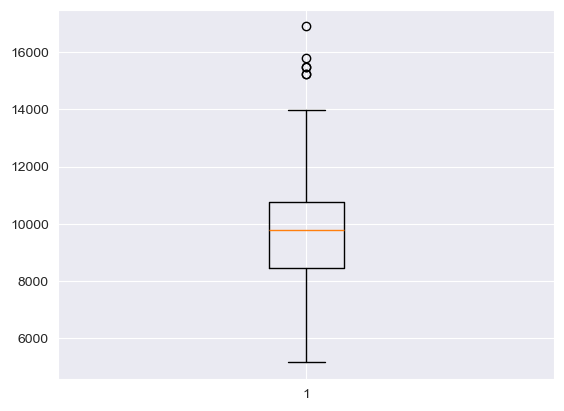

In [170]:
# Check for Outlier
plt.boxplot(crla_pr_cont1['Price'])
plt.show()

#### Age feature

In [171]:
# Replace the outlier value with the mean of the column
for i in crla_pr_cont1['Age_08_04']:
    Q1 = np.quantile(crla_pr_cont1.Age_08_04,0.25)
    Q3 = np.quantile(crla_pr_cont1.Age_08_04,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Age_08_04']=crla_pr_cont1['Age_08_04'].replace(i,np.mean(crla_pr_cont1['Age_08_04']))
crla_pr_cont1

,Price,Age_08_04,KM,Weight
0,13500.000000,23.0,46986,1165
1,13750.000000,23.0,72937,1165
2,13950.000000,24.0,41711,1165
3,10238.651011,26.0,48000,1165
4,13750.000000,30.0,38500,1170
...,...,...,...,...
1430,7500.000000,69.0,20544,1025
1431,10845.000000,72.0,19000,1015
1432,8500.000000,71.0,17016,1015
1433,7250.000000,70.0,16916,1015


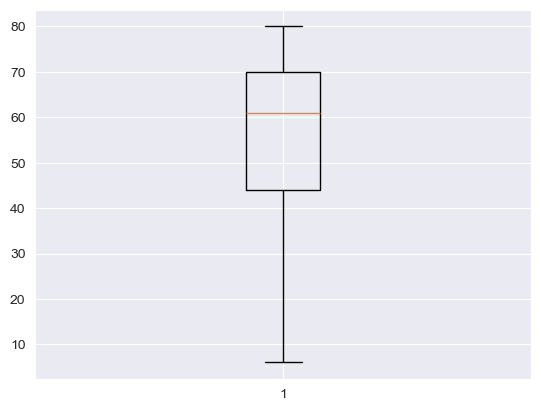

In [172]:
# Check for Outlier
plt.boxplot(crla_pr_cont1['Age_08_04'])
plt.show()

#### Run feature

In [173]:
# Replace the outlier value with the mean of the column
for i in crla_pr_cont1['KM']:
    Q1 = np.quantile(crla_pr_cont1.KM,0.25)
    Q3 = np.quantile(crla_pr_cont1.KM,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['KM']=crla_pr_cont1['KM'].replace(i,np.mean(crla_pr_cont1['KM']))
crla_pr_cont1

,Price,Age_08_04,KM,Weight
0,13500.000000,23.0,46986.0,1165
1,13750.000000,23.0,72937.0,1165
2,13950.000000,24.0,41711.0,1165
3,10238.651011,26.0,48000.0,1165
4,13750.000000,30.0,38500.0,1170
...,...,...,...,...
1430,7500.000000,69.0,20544.0,1025
1431,10845.000000,72.0,19000.0,1015
1432,8500.000000,71.0,17016.0,1015
1433,7250.000000,70.0,16916.0,1015


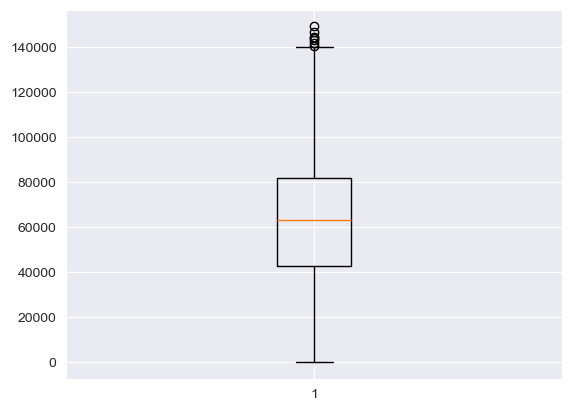

In [174]:
# Check for Outlier
plt.boxplot(crla_pr_cont1['KM'])
plt.show()

#### Weight feature

In [175]:
# Replace the outlier value with the mean of the column
for i in crla_pr_cont1['Weight']:
    Q1 = np.quantile(crla_pr_cont1.Weight,0.25)
    Q3 = np.quantile(crla_pr_cont1.Weight,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Weight']=crla_pr_cont1['Weight'].replace(i,np.mean(crla_pr_cont1['Weight']))
crla_pr_cont1

,Price,Age_08_04,KM,Weight
0,13500.000000,23.0,46986.0,1072.287108
1,13750.000000,23.0,72937.0,1072.287108
2,13950.000000,24.0,41711.0,1072.287108
3,10238.651011,26.0,48000.0,1072.287108
4,13750.000000,30.0,38500.0,1071.770242
...,...,...,...,...
1430,7500.000000,69.0,20544.0,1025.000000
1431,10845.000000,72.0,19000.0,1015.000000
1432,8500.000000,71.0,17016.0,1015.000000
1433,7250.000000,70.0,16916.0,1015.000000


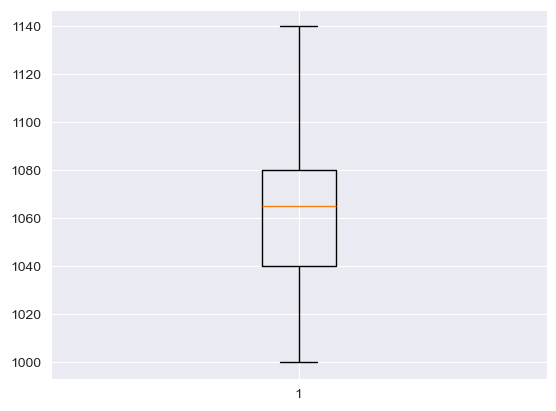

In [176]:
# Check for Outlier
plt.boxplot(crla_pr_cont1['Weight'])
plt.show()

#### b.) Median Imputation method

#### Price feature

In [177]:
# Replace the outlier value with the median of the column
crla_pr_cont2 = crla_pr_cont.copy()
for i in crla_pr_cont2['Price']:
    Q1 = np.quantile(crla_pr_cont2.Price,0.25)
    Q3 = np.quantile(crla_pr_cont2.Price,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Price']=crla_pr_cont2['Price'].replace(i,np.median(crla_pr_cont2['Price']))
crla_pr_cont2

,Price,Age_08_04,KM,Weight
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,9900,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1430,7500,69,20544,1025
1431,10845,72,19000,1015
1432,8500,71,17016,1015
1433,7250,70,16916,1015


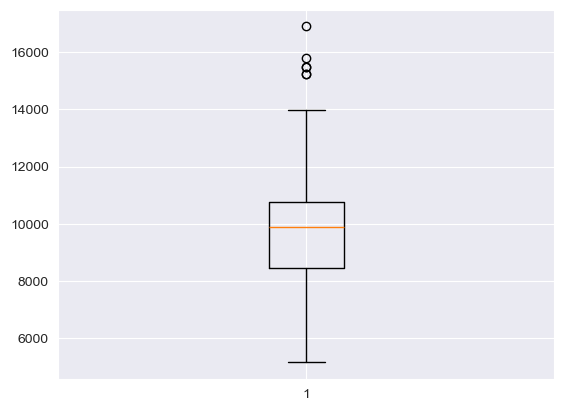

In [178]:
# Check for Outlier
plt.boxplot(crla_pr_cont2['Price'])
plt.show()

#### Age feature

In [179]:
# Replace the outlier value with the median of the column
for i in crla_pr_cont2['Age_08_04']:
    Q1 = np.quantile(crla_pr_cont2.Age_08_04,0.25)
    Q3 = np.quantile(crla_pr_cont2.Age_08_04,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Age_08_04']=crla_pr_cont2['Age_08_04'].replace(i,np.median(crla_pr_cont2['Age_08_04']))
crla_pr_cont2

,Price,Age_08_04,KM,Weight
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,9900,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1430,7500,69,20544,1025
1431,10845,72,19000,1015
1432,8500,71,17016,1015
1433,7250,70,16916,1015


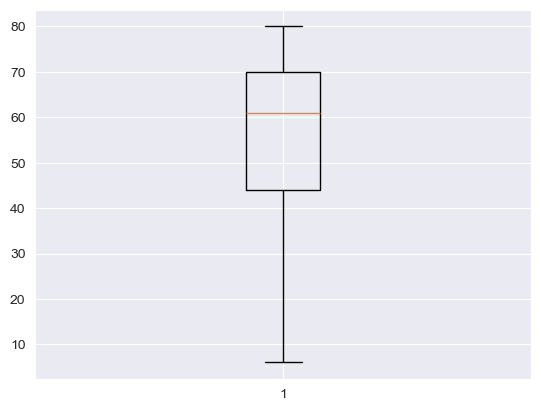

In [180]:
# Check for Outlier
plt.boxplot(crla_pr_cont2['Age_08_04'])
plt.show()

#### Run feature

In [181]:
# Replace the outlier value with the median of the column
for i in crla_pr_cont2['KM']:
    Q1 = np.quantile(crla_pr_cont2.KM,0.25)
    Q3 = np.quantile(crla_pr_cont2.KM,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['KM']=crla_pr_cont2['KM'].replace(i,np.median(crla_pr_cont2['KM']))
crla_pr_cont2

,Price,Age_08_04,KM,Weight
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,9900,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1430,7500,69,20544,1025
1431,10845,72,19000,1015
1432,8500,71,17016,1015
1433,7250,70,16916,1015


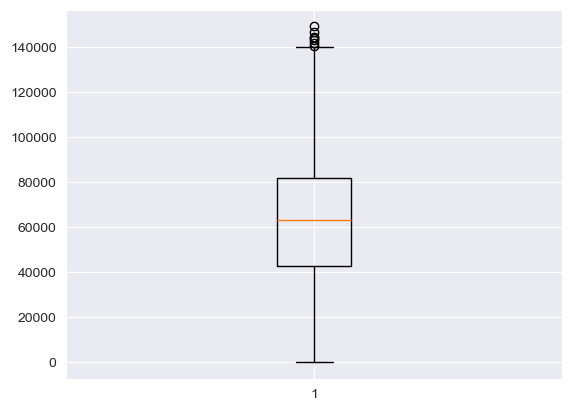

In [182]:
# Check for Outlier
plt.boxplot(crla_pr_cont2['KM'])
plt.show()

#### Weight feature

In [183]:
# Replace the outlier value with the median of the column
for i in crla_pr_cont2['Weight']:
    Q1 = np.quantile(crla_pr_cont2.Weight,0.25)
    Q3 = np.quantile(crla_pr_cont2.Weight,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Weight']=crla_pr_cont2['Weight'].replace(i,np.median(crla_pr_cont2['Weight']))
crla_pr_cont2

,Price,Age_08_04,KM,Weight
0,13500,23,46986,1070
1,13750,23,72937,1070
2,13950,24,41711,1070
3,9900,26,48000,1070
4,13750,30,38500,1070
...,...,...,...,...
1430,7500,69,20544,1025
1431,10845,72,19000,1015
1432,8500,71,17016,1015
1433,7250,70,16916,1015


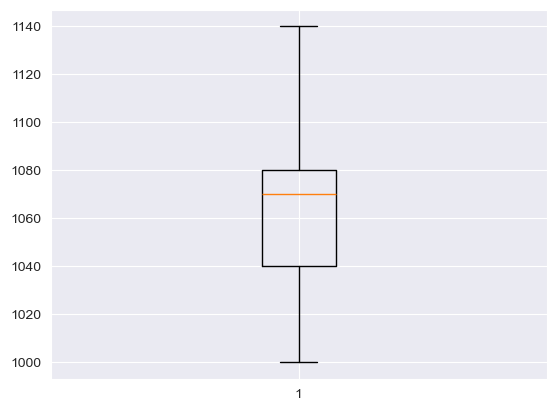

In [184]:
# Check for Outlier
plt.boxplot(crla_pr_cont2['Weight'])
plt.show()

### c.) Remove the outlier

#### Price feature

In [185]:
# Remove entire observation containing the outlier
crla_pr_cont3=crla_pr_cont.copy()
for i in crla_pr_cont3['Price']:
    Q1 = np.quantile(crla_pr_cont3.Price,0.25)
    Q3 = np.quantile(crla_pr_cont3.Price,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Price']==i].index,inplace=True)
crla_pr_cont3.shape

(1282, 4)

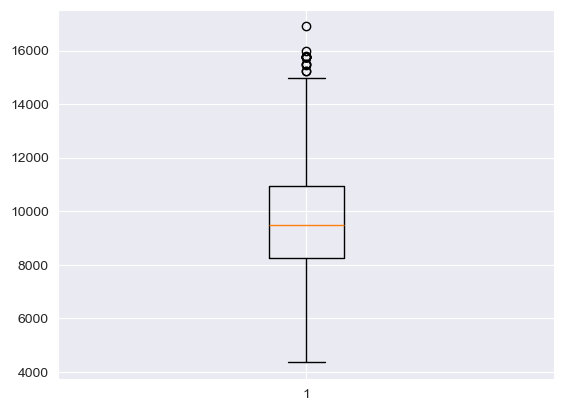

In [186]:
# Check for Outlier
plt.boxplot(crla_pr_cont3['Price'])
plt.show()

#### Age feature

In [187]:
# Remove entire observation containing the outlier
for i in crla_pr_cont3['Age_08_04']:
    Q1 = np.quantile(crla_pr_cont3.Age_08_04,0.25)
    Q3 = np.quantile(crla_pr_cont3.Age_08_04,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Age_08_04']==i].index,inplace=True)
crla_pr_cont3.shape

(1282, 4)

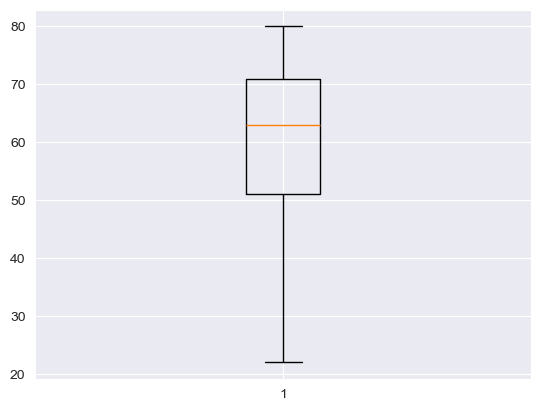

In [188]:
# Check for Outlier
plt.boxplot(crla_pr_cont3['Age_08_04'])
plt.show()

#### Run feature

In [189]:
# Remove entire observation containing the outlier
for i in crla_pr_cont3['KM']:
    Q1 = np.quantile(crla_pr_cont3.KM,0.25)
    Q3 = np.quantile(crla_pr_cont3.KM,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['KM']==i].index,inplace=True)
crla_pr_cont3.shape

(1225, 4)

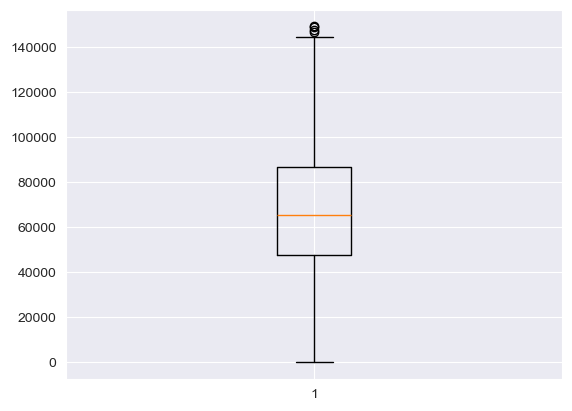

In [190]:
# Check for Outlier
plt.boxplot(crla_pr_cont3['KM'])
plt.show()

#### Weight feature

In [191]:
# Remove entire observation containing the outlier
for i in crla_pr_cont3['Weight']:
    Q1 = np.quantile(crla_pr_cont3.Weight,0.25)
    Q3 = np.quantile(crla_pr_cont3.Weight,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Weight']==i].index,inplace=True)
crla_pr_cont3.shape

(1190, 4)

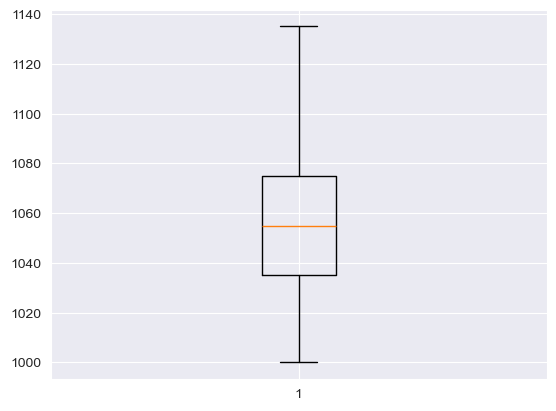

In [192]:
# Check for Outlier
plt.boxplot(crla_pr_cont3['Weight'])
plt.show()

### Apply Transformations to the model

### Model after applying Mean imputation method

In [193]:
model_1 = smf.ols("Price~Age_08_04+KM+Weight",data=crla_pr_cont1).fit()

In [194]:
pred_1 = model_1.predict(crla_pr_cont1)
pred_1

0       11681.323118
1       11538.662568
2       11653.198272
3       11504.379470
4       11328.716376
            ...     
1430     9254.371308
1431     9103.195347
1432     9171.225126
1433     9228.897984
1434     8863.260860
Length: 1435, dtype: float64

In [195]:
# Overall Summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          5.18e-152
Time:                        14:58:37   Log-Likelihood:                -12440.
No. Observations:                1435   AIC:                         2.489e+04
Df Residuals:                    1431   BIC:                         2.491e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04   1385.095     10.475      0.000    1.18e+04    1.72e+04
Age_08_04    -57.1231      2.638    -21.654      0.000     -62.298     -51.948
KM            -0.0055      0.001     -3.681      0.000      -0.008      -0.003
Weight        -1.1706      1.257     -0.931      0.352      -3.636       1.295
==============================================================================
Omnibus:                        8.486   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.593
Skew:                           0.181   Prob(JB):                       0.0136
Kurtosis:                       2.887   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
# Root Mean Square Error(RMSE)
rmse_1 = np.sqrt(model_1.mse_resid)
rmse_1

1410.0019666187677

#### The R² value is decreased and the RMSE value increased.
#### Apply all other transformations and select the model with best R² value and low RMSE.

### Model after applying Median imputation method

In [197]:
model_2 = smf.ols("Price~Age_08_04+KM+Weight",data=crla_pr_cont2).fit()

In [198]:
pred_2 = model_2.predict(crla_pr_cont2)
pred_2

0       11524.234368
1       11394.421329
2       11496.756078
3       11357.566839
4       11189.627737
            ...     
1430     9262.281070
1431     9126.980722
1432     9190.770246
1433     9245.135557
1434     8822.700410
Length: 1435, dtype: float64

In [199]:
# Overall Summary
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          1.46e-129
Time:                        14:58:37   Log-Likelihood:                -12482.
No. Observations:                1435   AIC:                         2.497e+04
Df Residuals:                    1431   BIC:                         2.499e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.499e+04   1424.366     10.521      0.000    1.22e+04    1.78e+04
Age_08_04    -53.8651      2.704    -19.923      0.000     -59.169     -48.561
KM            -0.0050      0.002     -3.266      0.001      -0.008      -0.002
Weight        -1.8571      1.292     -1.437      0.151      -4.392       0.678
==============================================================================
Omnibus:                       15.066   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.793
Skew:                           0.224   Prob(JB):                     0.000613
Kurtosis:                       2.782   Cond. No.                     2.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
# Root Mean Square Error(RMSE)
rmse_2 = np.sqrt(model_2.mse_resid)
rmse_2

1452.481153014752

### Model after removing outlier

In [201]:
model_3 = smf.ols("Price~Age_08_04+KM+Weight",data=crla_pr_cont3).fit()

In [202]:
pred_3 = model_3.predict(crla_pr_cont3)
pred_3

9       14025.041525
27      14124.027861
30      14427.183670
31      14682.051409
33      14329.296252
            ...     
1430     9375.805970
1431     8984.567853
1432     9117.685303
1433     9218.380806
1434    10112.388566
Length: 1190, dtype: float64

In [203]:
# Overall Summary
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:37   Log-Likelihood:                -9951.2
No. Observations:                1190   AIC:                         1.991e+04
Df Residuals:                    1186   BIC:                         1.993e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4167.8648   1193.059      3.493      0.000    1827.123    6508.607
Age_08_04    -98.9746      2.526    -39.181      0.000    -103.931     -94.018
KM            -0.0172      0.001    -14.234      0.000      -0.020      -0.015
Weight        12.0885      1.100     10.987      0.000       9.930      14.247
==============================================================================
Omnibus:                       93.202   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.625
Skew:                          -0.391   Prob(JB):                     7.69e-59
Kurtosis:                       5.188   Cond. No.                     2.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
# Root Mean Square Error(RMSE)
rmse_3 = np.sqrt(model_3.mse_resid)
rmse_3

1038.0259523718776

#### Out of all the transformations, the model after removing the outlier has the best R² value and less RMSE value.
#### But this model performance is poor than the Raw data model.

### Check the significance of each indpendent variable

#### Perform Simple linear regression on each variable and check the significance. If the P-value<0.05, then it is significant.

#### Check for Significance of Age feature

In [205]:
Slr_Age = smf.ols("Price~Age_08_04",data=crla_pr_cont).fit()

In [206]:
Slr_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:37   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.926    138.818      0.000       2e+04    2.05e+04
Age_08_04   -170.3487      2.474    -68.847      0.000    -175.202    -165.495
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As the P-value<0.05, Age feature is significant  to the model.

#### Check for Significance of Run feature

In [207]:
Slr_Run = smf.ols("Price~KM",data=crla_pr_cont).fit()

In [208]:
Slr_Run.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          4.12e-124
Time:                        14:58:37   Log-Likelihood:                -13509.
No. Observations:                1435   AIC:                         2.702e+04
Df Residuals:                    1433   BIC:                         2.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    163.344     88.643      0.000    1.42e+04    1.48e+04
KM            -0.0548      0.002    -26.222      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As the P-value<0.05, Run feature is insignificant  to the model.

#### Check for Significance of  Weight feature

In [209]:
Slr_Wt = smf.ols("Price~Weight",data=crla_pr_cont).fit()

In [210]:
Slr_Wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          1.55e-127
Time:                        14:58:37   Log-Likelihood:                -13501.
No. Observations:                1435   AIC:                         2.701e+04
Df Residuals:                    1433   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.193e+04   1601.273    -19.938      0.000   -3.51e+04   -2.88e+04
Weight        39.7719      1.492     26.665      0.000      36.846      42.698
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As the P-value<0.05, Weight feature significant  to the model.

#### The features are independently significant. 
#### Let us see whether they are combinedly showing the same.

#### Combination of features

In [211]:
arw_pr = smf.ols("Price~Age_08_04+KM+Weight",data=crla_pr_cont).fit()

In [212]:
arw_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2635.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:37   Log-Likelihood:                -12444.
No. Observations:                1435   AIC:                         2.490e+04
Df Residuals:                    1431   BIC:                         2.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1722.7095    967.073     -1.781      0.075   -3619.743     174.324
Age_08_04   -120.2686      2.741    -43.881      0.000    -125.645    -114.892
KM            -0.0241      0.001    -20.083      0.000      -0.026      -0.022
Weight        19.4256      0.841     23.101      0.000      17.776      21.075
==============================================================================
Omnibus:                      216.390   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2156.068
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       8.964   Cond. No.                     2.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
# Root Mean Square Error(RMSE)
rmse_arw_pr = np.sqrt(arw_pr.mse_resid)
rmse_arw_pr

1414.242733320169

#### The above model is showing good R² value and both the variables are significant to the model, as the P-values are <0.05. However check for multicollinearity by calculating Variance Inflation factor.

### Calculate Variance Inflation Factor

In [214]:
rsq_a = smf.ols('Age_08_04~KM+Weight',data=crla_pr_cont).fit().rsquared  
vif_a = 1/(1-rsq_a)
vif_a

1.8559235693401308

In [215]:
rsq_r = smf.ols('KM~Age_08_04+Weight',data=crla_pr_cont).fit().rsquared  
vif_r = 1/(1-rsq_r)
vif_r

1.4528951340124632

In [216]:
rsq_w = smf.ols('Weight~Age_08_04+KM',data=crla_pr_cont).fit().rsquared  
vif_w = 1/(1-rsq_w)
vif_w

1.38420903445645

#### We have to remove the variable which is having the highest Variance Inflation factor(VIF). But here all the variables are having almost same VIF value.
#### So, Build models eliminating one variable in each model.

In [217]:
Age_Run = smf.ols("Price~Age_08_04+KM",data=crla_pr_cont).fit()

In [218]:
Age_Run.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     2687.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:38   Log-Likelihood:                -12672.
No. Observations:                1435   AIC:                         2.535e+04
Df Residuals:                    1432   BIC:                         2.536e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.045e+04    139.846    146.207      0.000    2.02e+04    2.07e+04
Age_08_04   -153.6003      2.729    -56.276      0.000    -158.954    -148.246
KM            -0.0164      0.001    -12.161      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      453.671   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3455.391
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                      10.173   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# Root Mean Square Error(RMSE)
rmse_Age_Run = np.sqrt(Age_Run.mse_resid)
rmse_Age_Run

1656.5119695786611

In [220]:
Run_Wt = smf.ols("Price~KM+Weight",data=crla_pr_cont).fit()

In [221]:
Run_Wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1276.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          7.40e-319
Time:                        14:58:38   Log-Likelihood:                -13056.
No. Observations:                1435   AIC:                         2.612e+04
Df Residuals:                    1432   BIC:                         2.613e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.727e+04   1182.234    -23.066      0.000   -2.96e+04    -2.5e+04
KM            -0.0535      0.002    -35.078      0.000      -0.057      -0.051
Weight        38.8517      1.095     35.495      0.000      36.705      40.999
==============================================================================
Omnibus:                      372.677   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4828.633
Skew:                          -0.831   Prob(JB):                         0.00
Kurtosis:                      11.831   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
# Root Mean Square Error(RMSE)
rmse_Run_Wt = np.sqrt(Run_Wt.mse_resid)
rmse_Run_Wt

2165.20707705479

In [223]:
Wt_Age = smf.ols("Price~Weight+Age_08_04",data=crla_pr_cont).fit()

In [224]:
Wt_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2929.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:58:38   Log-Likelihood:                -12622.
No. Observations:                1435   AIC:                         2.525e+04
Df Residuals:                    1432   BIC:                         2.527e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3356.0245   1056.440      3.177      0.002    1283.689    5428.360
Weight        14.7506      0.915     16.129      0.000      12.957      16.545
Age_08_04   -150.9804      2.574    -58.651      0.000    -156.030    -145.931
==============================================================================
Omnibus:                      149.410   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.718
Skew:                          -0.228   Prob(JB):                    3.98e-209
Kurtosis:                       6.980   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
# Root Mean Square Error(RMSE)
rmse_Wt_Age = np.sqrt(Wt_Age.mse_resid)
rmse_Wt_Age

1600.6272826537731

### Final Results

In [226]:
results = {"MODEL":pd.Series(["Raw data","Mean Imputation model","Median Imputation model","After removing outlier","Comb. of Age and Run","Comb. of Run and Weight","Comb. of Weight and Age"]),
           "R²_Values":pd.Series([model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared,Age_Run.rsquared,Run_Wt.rsquared,Wt_Age.rsquared]),
           "RMSE_Values":pd.Series([rmse,rmse_1,rmse_2,rmse_3,rmse_Age_Run,rmse_Run_Wt,rmse_Wt_Age])
          }
result_table=pd.DataFrame(results)
result_table 

,MODEL,R²_Values,RMSE_Values
0,Raw data,0.846740,1414.242733
1,Mean Imputation model,0.387962,1410.001967
2,Median Imputation model,0.342050,1452.481153
3,After removing outlier,0.724773,1038.025952
4,Comb. of Age and Run,0.789587,1656.511970
5,Comb. of Run and Weight,0.640513,2165.207077
6,Comb. of Weight and Age,0.803544,1600.627283


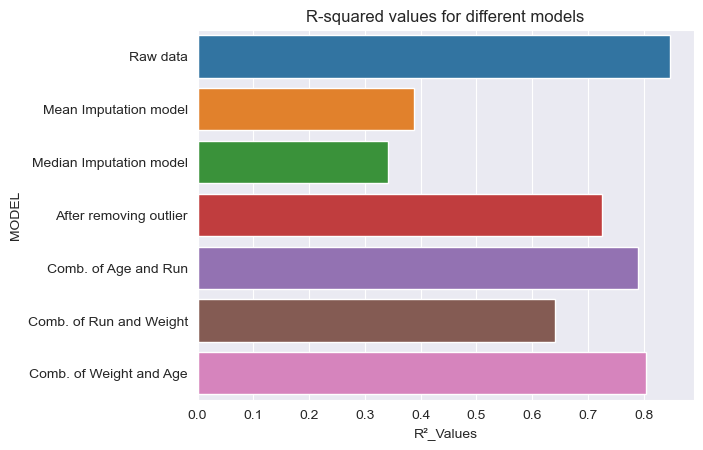

In [227]:
sb.barplot(x=result_table['R²_Values'],y=result_table['MODEL'])
plt.title("R-squared values for different models")
plt.show()

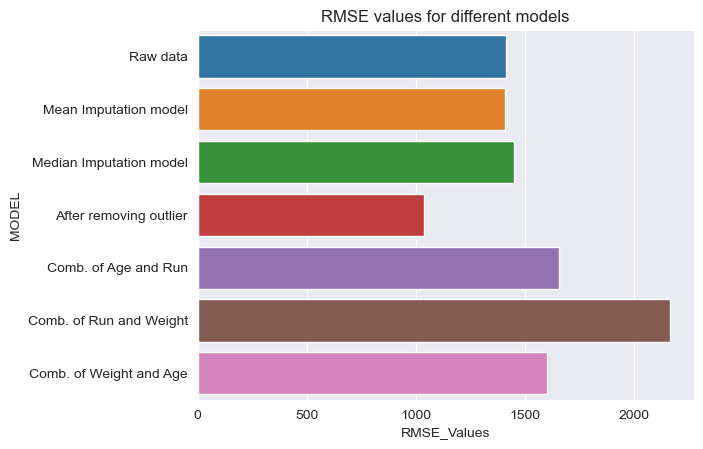

In [228]:
sb.barplot(x=result_table['RMSE_Values'],y=result_table['MODEL'])
plt.title("RMSE values for different models")
plt.show()

#### From the above results, we can see that the model using Raw data gives the best R² value and less RMSE value
#### Hence this model can be selected as our final model and used for predicting the price.

### Residual Analysis

#### Q-Q Plot

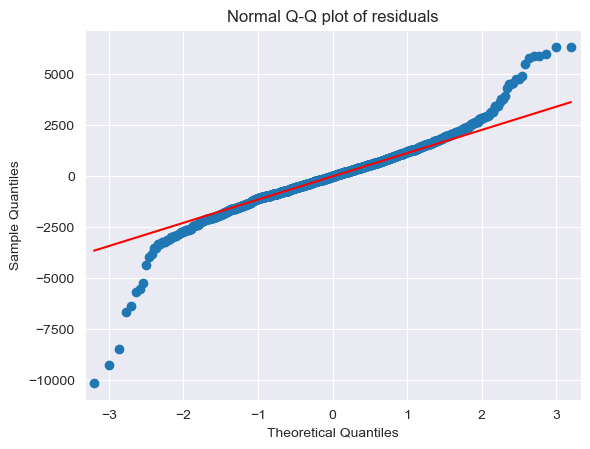

In [229]:
#Residuals values or errors
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### Test for Homoscedasticity

In [230]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

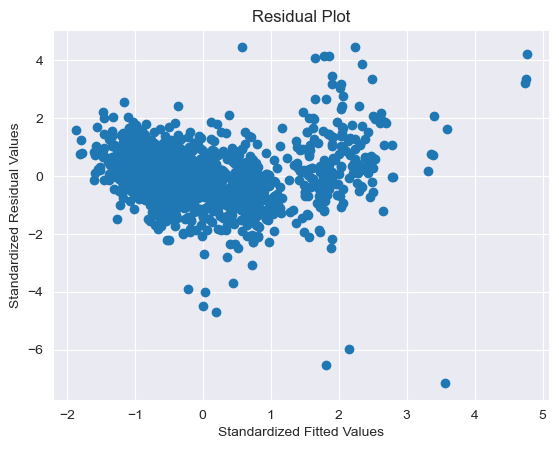

In [231]:
plt.scatter(get_standardized_values(model.fittedvalues), model.resid_pearson)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

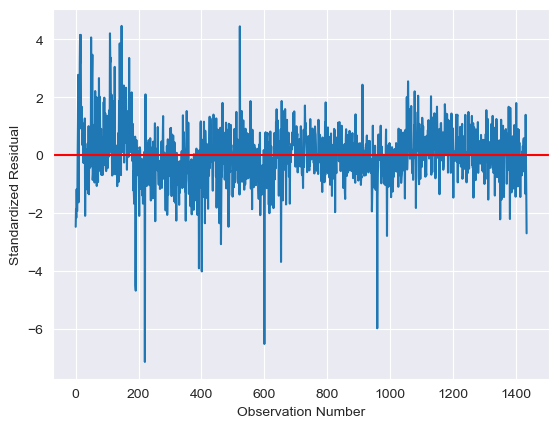

In [232]:
plt.plot(np.arange(len(crla_pr_cont)),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 
plt.show()

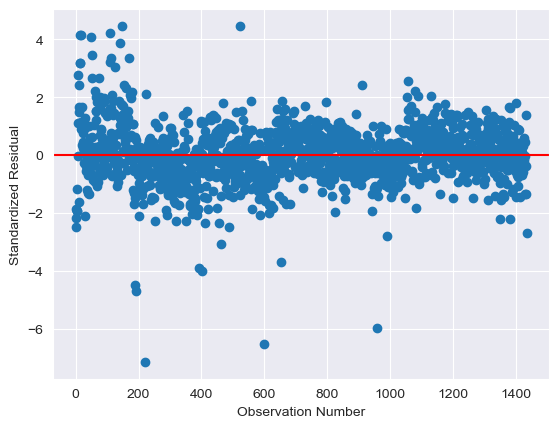

In [233]:
plt.scatter(np.arange(len(crla_pr_cont)),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

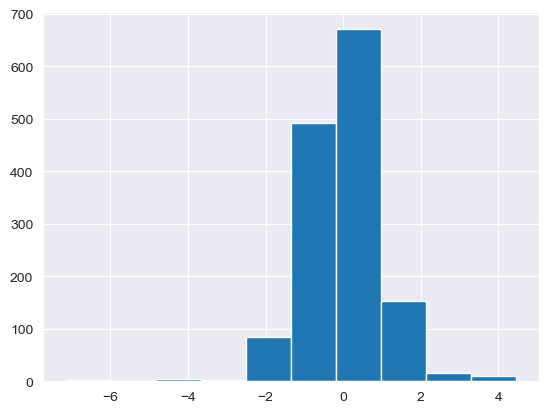

In [234]:
plt.hist(model.resid_pearson)
plt.show()

#### Residual VS Regressors

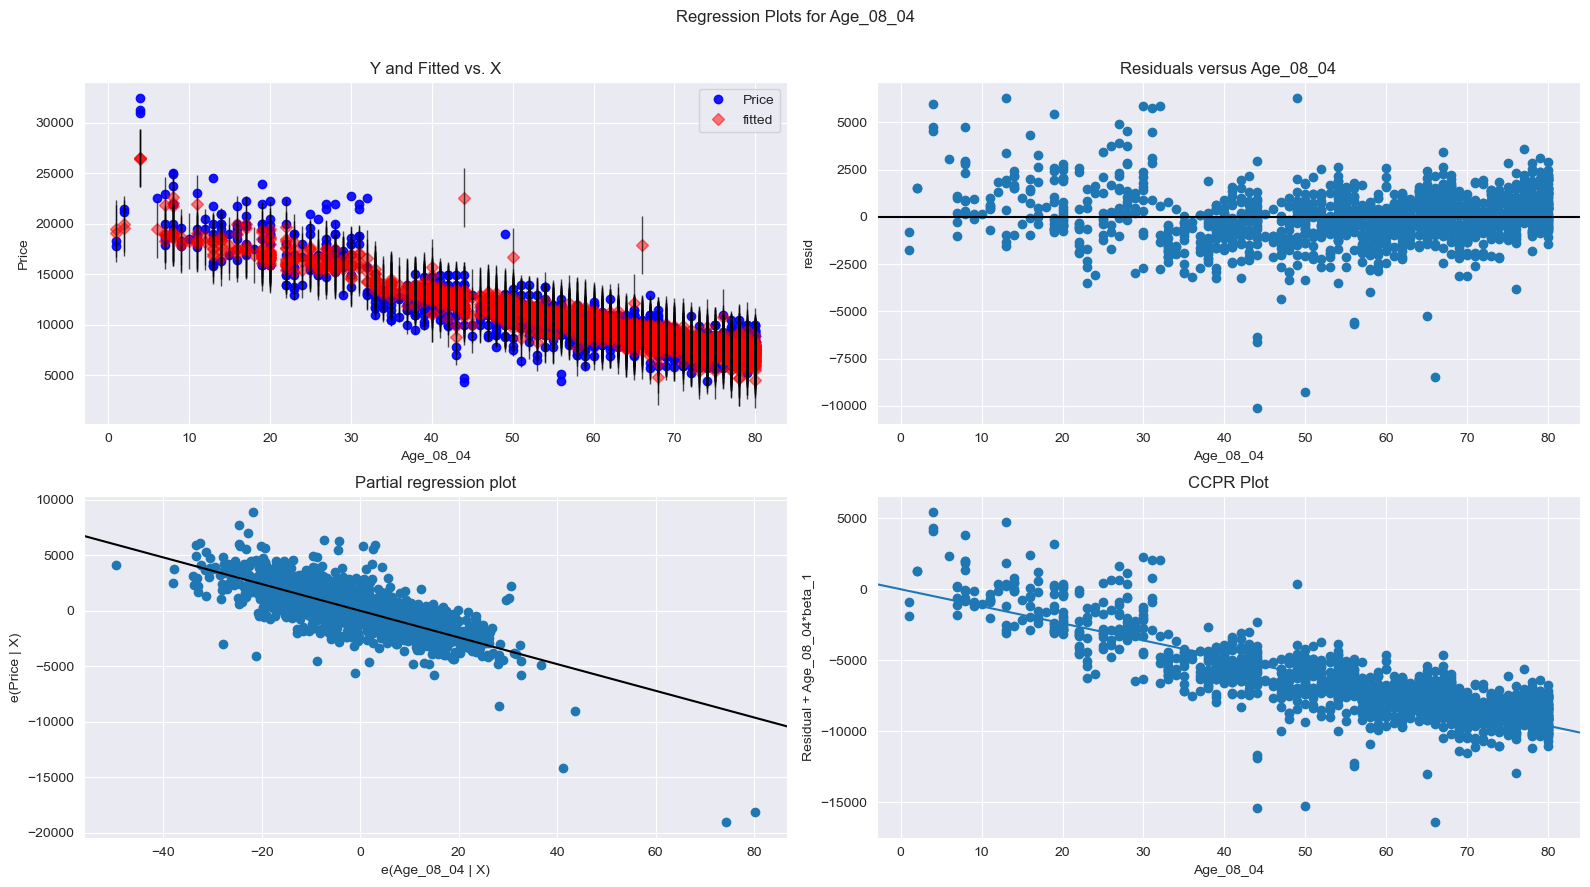

In [235]:
fig = plt.figure(figsize = (16,9))
plot_Age = sm.graphics.plot_regress_exog(model, 'Age_08_04', fig=fig)
plt.show()

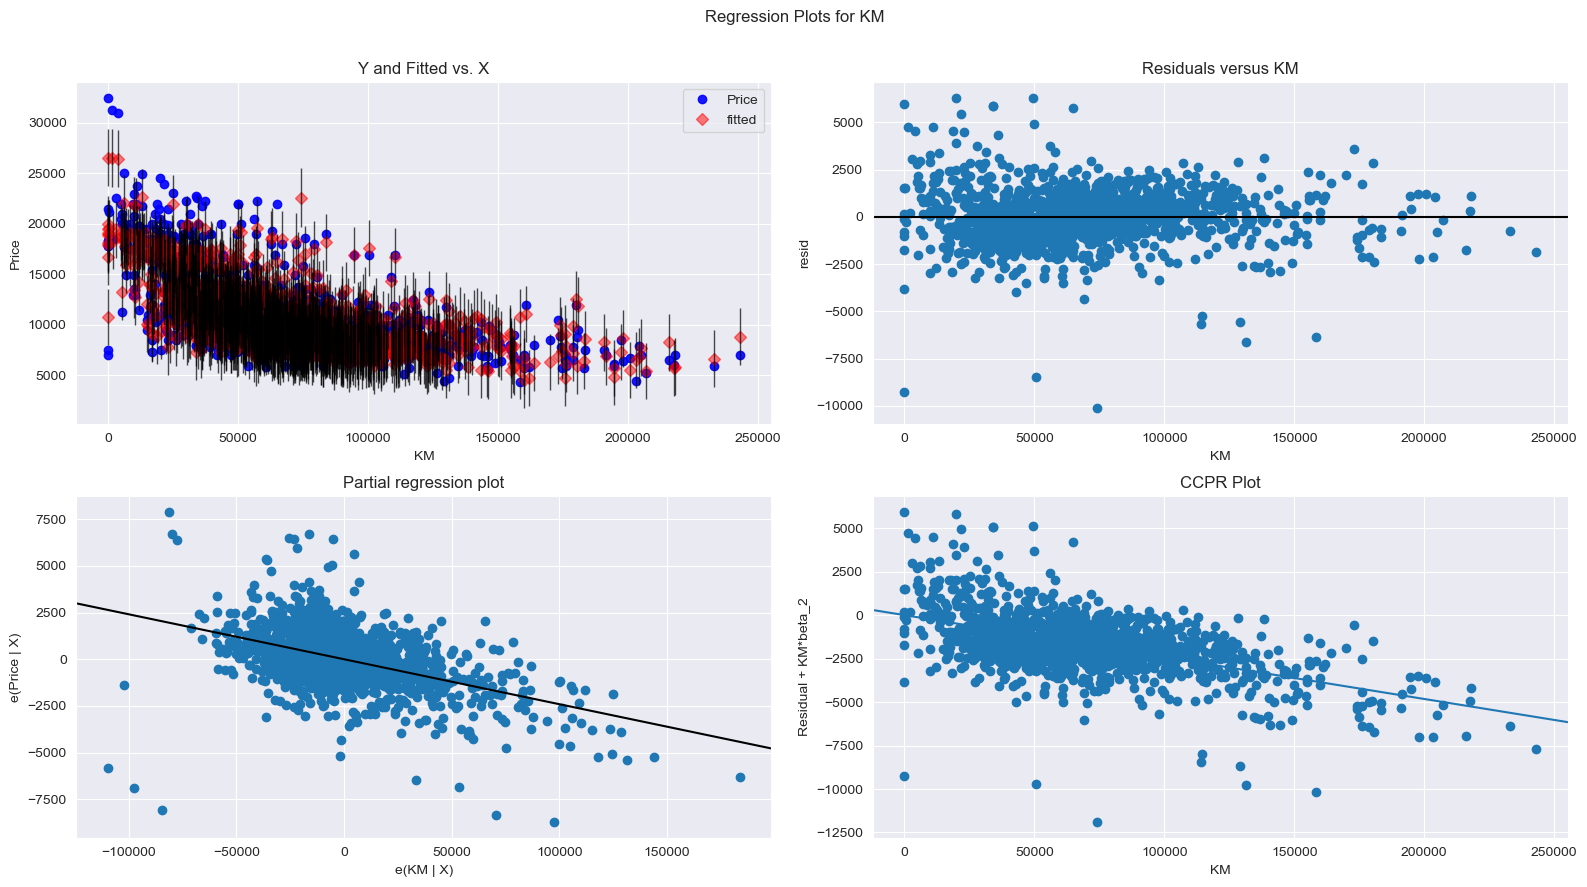

In [236]:
fig = plt.figure(figsize = (16,9))
plot_Run = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

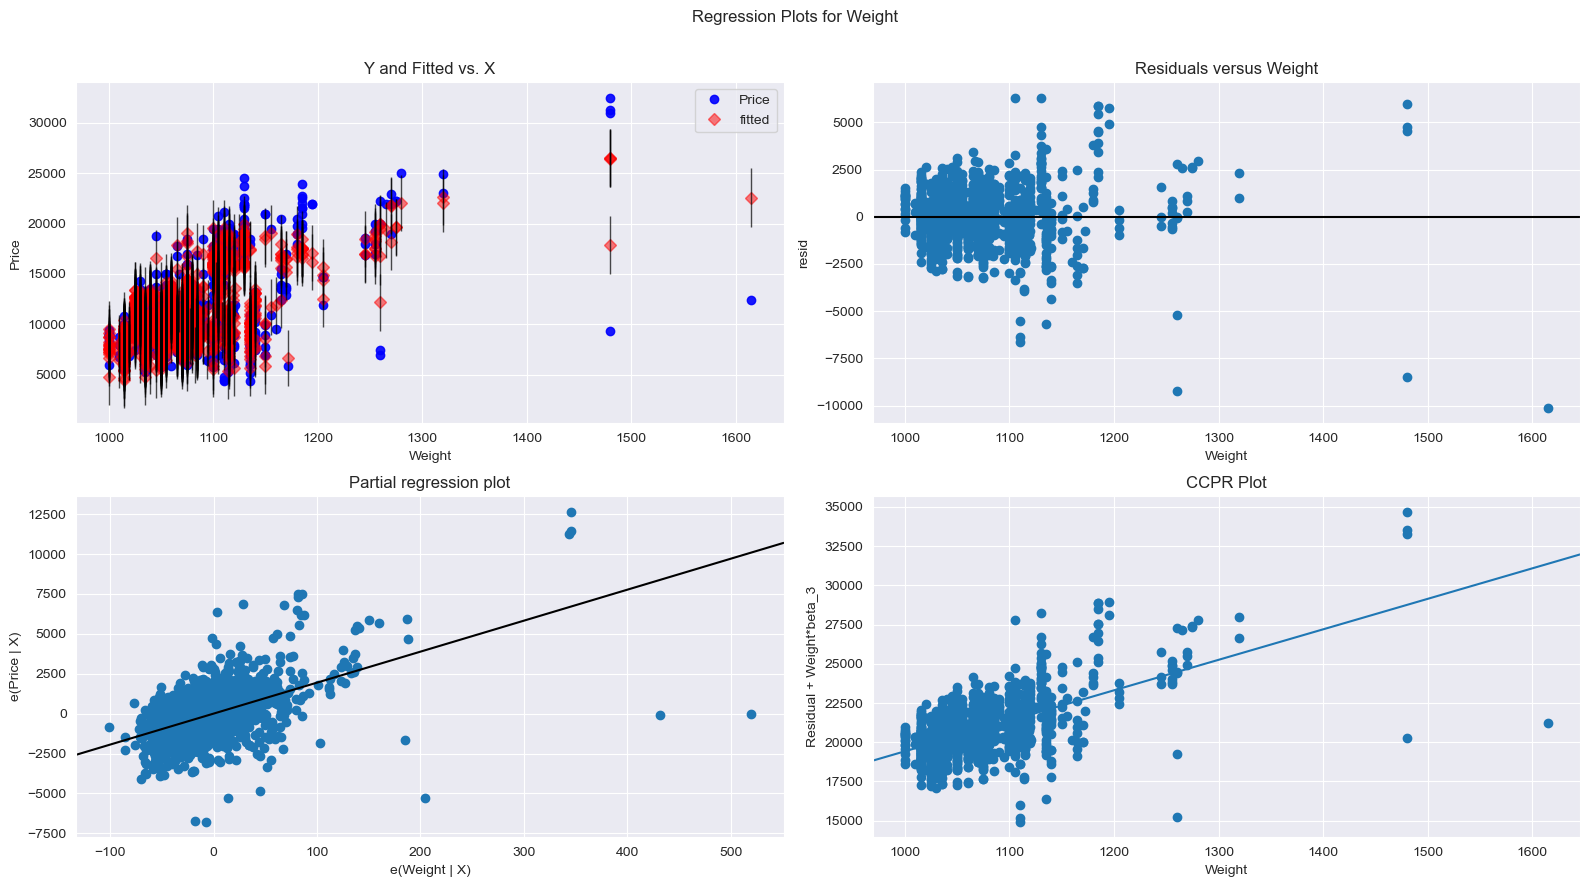

In [237]:
fig = plt.figure(figsize = (16,9))
plot_Weight = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

### Detecting Influencers in the Model

#### By using Cook's distance

In [238]:
influence_points=model.get_influence()
c, p_value=influence_points.cooks_distance

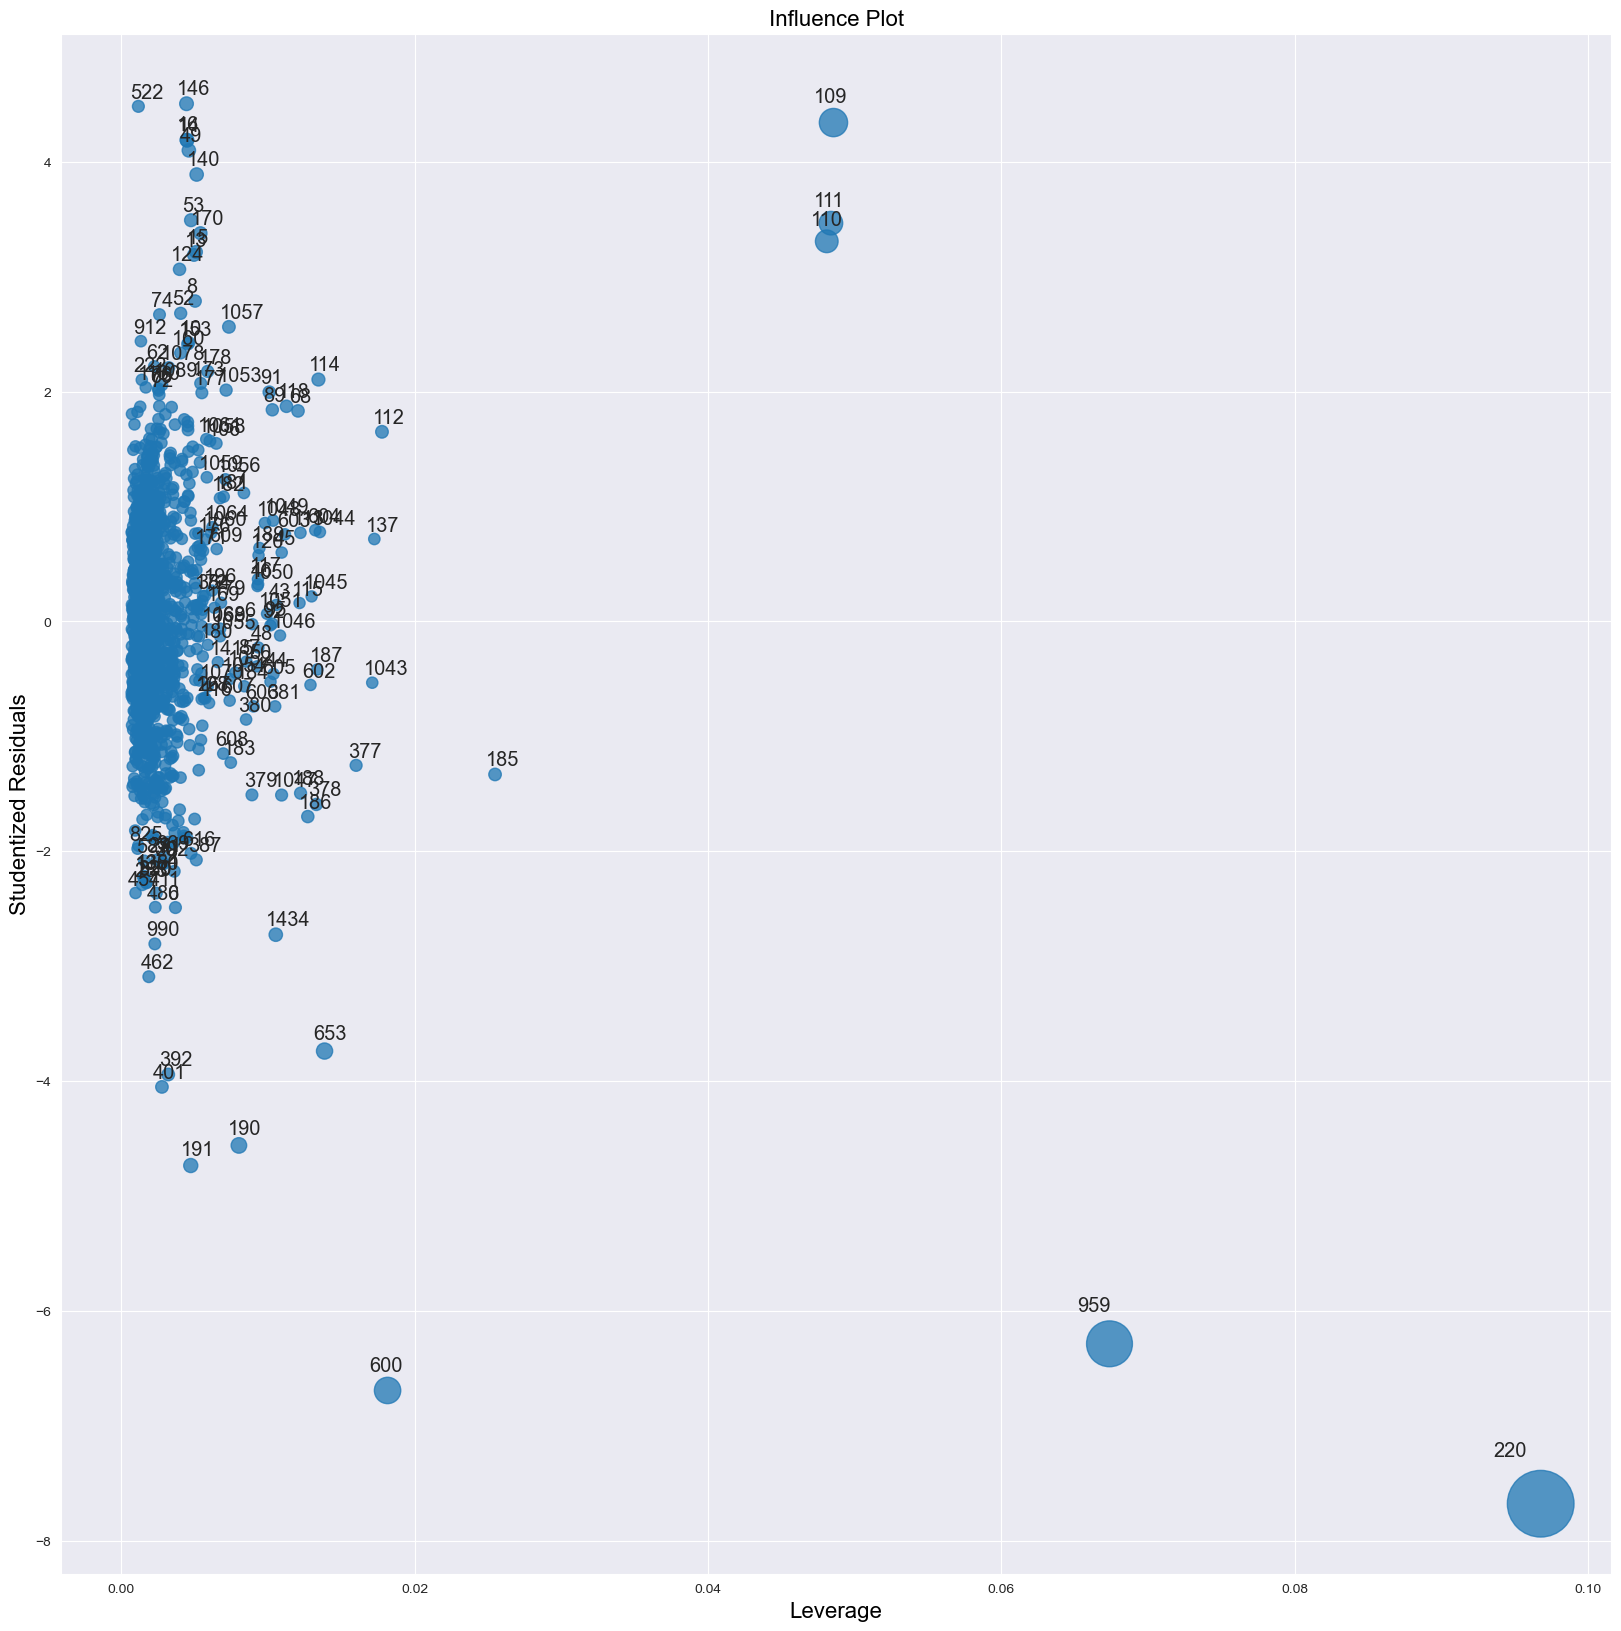

In [239]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)
plt.show()

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [240]:
k=crla_pr_cont.shape[1]
n=crla_pr_cont.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.01


#### Let's plot the influencers and also plot a cut off line using the stem plot

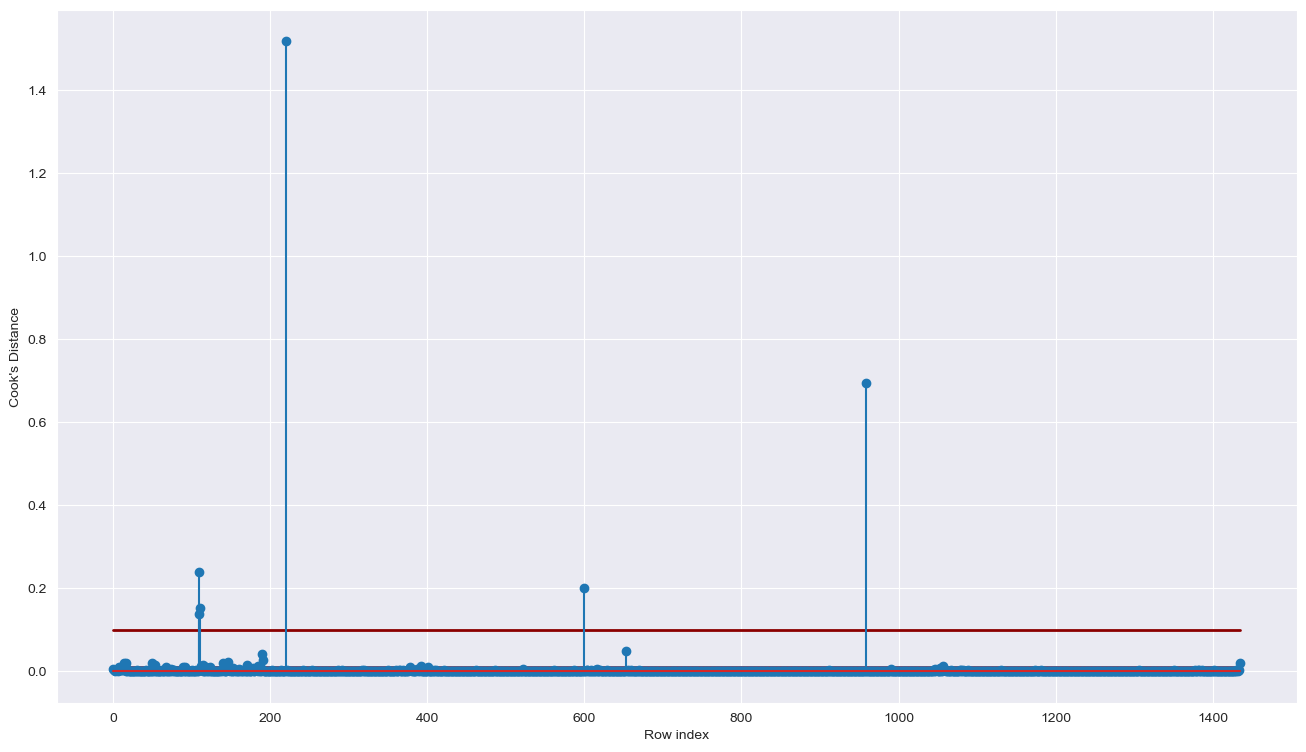

In [241]:
fig = plt.figure(figsize = (16,9))
x = [0,1435]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.01,0.01]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(crla_pr_cont)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [242]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(220, 1.5183498455720137)

In [243]:
crla_pr_cont[crla_pr_cont.index.isin([220])] 

,Price,Age_08_04,KM,Weight
220,12450,44,74172,1615


#### Let's improve the model by deleting the influence point and creating a new dataframe 

In [244]:
crla_pr_f= crla_pr_cont.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
crla_pr_f=crla_pr_f.drop(crla_pr_f.index[[220]],axis=0).reset_index(drop=True)
crla_pr_f.shape

(1434, 4)

### Model Deletion Diagnostics and Final Model

In [245]:
while model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        model=smf.ols('Price~Age_08_04+KM+Weight',data=crla_pr_f).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        crla_pr_f=crla_pr_f.drop(crla_pr_f.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        crla_pr_f
    else:
        model_f=smf.ols('Price~Age_08_04+KM+Weight',data=crla_pr_f).fit()
        model_f.rsquared , model_f.aic
        print("Thus model accuracy is improved to",model_f.rsquared)

Thus model accuracy is improved to 0.8578485217349112
Thus model accuracy is improved to 0.8632770464094519
Thus model accuracy is improved to 0.8607898879814079
Thus model accuracy is improved to 0.8581582611566132
Thus model accuracy is improved to 0.855494180721075
Thus model accuracy is improved to 0.8573270219543844
Thus model accuracy is improved to 0.8593111598478697
Thus model accuracy is improved to 0.860225645330987
Thus model accuracy is improved to 0.8624893340871542
Thus model accuracy is improved to 0.8631949394421121
Thus model accuracy is improved to 0.8638982295278871
Thus model accuracy is improved to 0.8646931674774829
Thus model accuracy is improved to 0.8655914622411143
Thus model accuracy is improved to 0.8659064994817833
Thus model accuracy is improved to 0.8662670534586867
Thus model accuracy is improved to 0.8650450242099621
Thus model accuracy is improved to 0.8652057341292722
Thus model accuracy is improved to 0.8654490662150328
Thus model accuracy is improve

In [246]:
influence_points=model_f.get_influence()
c, p_value=influence_points.cooks_distance

In [247]:
crla_pr_f.shape

(910, 4)

In [248]:
crla_pr_f.head()

,Price,Age_08_04,KM,Weight
0,14950,26,32692,1100
1,15500,22,41000,1100
2,14950,23,10000,1100
3,14750,27,27500,1100
4,15500,25,49163,1165


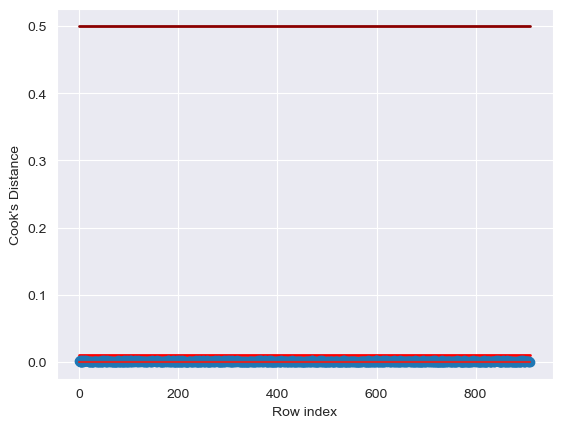

In [249]:
# fig = plt.figure(figsize = (16,9))
x = [0,910]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.01,0.01]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(crla_pr_f)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### Hence, we can see that there are no influncers present in our model.

In [250]:
# Overall Summary
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     2730.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:59:03   Log-Likelihood:                -7101.9
No. Observations:                 910   AIC:                         1.421e+04
Df Residuals:                     906   BIC:                         1.423e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -112.5585    829.245     -0.136      0.892   -1740.023    1514.906
Age_08_04   -106.9351      1.706    -62.684      0.000    -110.283    -103.587
KM            -0.0110      0.001    -13.618      0.000      -0.013      -0.009
Weight        16.2236      0.758     21.390      0.000      14.735      17.712
==============================================================================
Omnibus:                       13.736   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.560
Skew:                           0.055   Prob(JB):                       0.0138
Kurtosis:                       2.538   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
# Root Mean Square Error(RMSE)
rmse_f = np.sqrt(model_f.mse_resid)
rmse_f

594.402223468677

#### From the above results, we can see that this model gives the best R² value and less RMSE value
#### Hence this model can be selected as our final model and used for predicting the price.

### Using the model for new data

In [252]:
#Predict for new data
newdata={'Age_08_04':[10,20,30],'KM':[10000,20000,10000],'Weight':[1000,1500,2000]}

In [253]:
data_pred=pd.DataFrame(newdata,columns=['Age_08_04','KM','Weight'])
data_pred

,Age_08_04,KM,Weight
0,10,10000,1000
1,20,20000,1500
2,30,10000,2000


In [254]:
new_pred = model_f.predict(data_pred)
data_pred['Pred_Price']=np.round(new_pred,2)
data_pred

,Age_08_04,KM,Weight,Pred_Price
0,10,10000,1000,14931.47
1,20,20000,1500,21863.67
2,30,10000,2000,29016.40


#### Hence the Multiple Linear Regression model gives accurate predictions.